In [1]:
import pandas as pd

dataset = pd.read_csv(r"veri.csv")

dataset

,Yiyecek,Enerji_kcal,Yağ_g,Doymuş_Yağ_g,Karbonhidrat_g,Şeker_g,Lif_g,Protein_g,Gereken_Adım,Yürüme_Süresi_Dk,Mesafe_KM
0,Kek,358.8,23.8,8.2,57.2,30.3,2.1,5.3,10908,109.1,7.64
1,Meyve Suyu,112.6,0.0,0.0,25.3,24.1,0.2,0.7,2459,24.6,1.72
2,Gazlı İçecek,145.7,0.0,0.0,31.4,33.8,0.0,0.0,2939,29.4,2.06
3,Dondurma,252.9,11.2,8.6,31.3,29.4,1.0,3.7,6163,61.6,4.31
4,Bisküvi,371.0,21.8,7.5,51.6,23.4,2.9,7.0,9979,99.8,6.99
...,...,...,...,...,...,...,...,...,...,...,...
4995,Kek,355.0,17.4,9.0,58.7,33.6,2.5,6.3,9276,92.8,6.49
4996,Şekerleme,354.0,0.7,0.6,71.2,64.7,0.2,1.5,8207,82.1,5.74
4997,Dondurma,200.4,13.0,9.8,25.4,23.4,0.1,4.8,4939,49.4,3.46
4998,Bisküvi,481.7,16.2,8.3,64.0,22.4,1.9,6.5,13422,134.2,9.40


In [2]:
XSample = dataset.iloc[:,1:8]
ySample = dataset.Gereken_Adım


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(XSample)

In [3]:
from sklearn.model_selection import train_test_split

XTrain,XTest,yTrain,yTest=train_test_split(XSample,ySample,test_size=0.20,random_state=42)

In [ ]:
#1. Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

# Gradient Boosting model
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Model eğitimi
gb_model.fit(XTrain, yTrain)

# Tahminler
y_pred_train = gb_model.predict(XTrain)
y_pred_test = gb_model.predict(XTest)

# Sınıflandırma için eşik değeri
threshold = np.mean(ySample)
y_pred_train_class = (y_pred_train > threshold).astype(int)
y_pred_test_class = (y_pred_test > threshold).astype(int)
y_train_class = (yTrain > threshold).astype(int)
y_test_class = (yTest > threshold).astype(int)

# Performans metrikleri
train_accuracy = accuracy_score(y_train_class, y_pred_train_class)
train_f1 = f1_score(y_train_class, y_pred_train_class, average='weighted')
test_accuracy = accuracy_score(y_test_class, y_pred_test_class)
test_f1 = f1_score(y_test_class, y_pred_test_class, average='weighted')

print("Eğitim Seti Performansı:")
print(f'Accuracy: {train_accuracy:.4f}')
print(f'F1 Score: {train_f1:.4f}')

print("\nTest Seti Performansı:")
print(f'Accuracy: {test_accuracy:.4f}')
print(f'F1 Score: {test_f1:.4f}')

print("\nÖzellik Önem Sıralaması:")
feature_importance = pd.DataFrame({
    'feature': XSample.columns,
    'importance': gb_model.feature_importances_
})
print(feature_importance.sort_values('importance', ascending=False))


Eğitim Seti Performansı:
Accuracy: 0.9780
F1 Score: 0.9780

Test Seti Performansı:
Accuracy: 0.9640
F1 Score: 0.9640

Özellik Önem Sıralaması:
          feature  importance
0     Enerji_kcal    0.865986
1           Yağ_g    0.113582
4         Şeker_g    0.011295
2    Doymuş_Yağ_g    0.003773
6       Protein_g    0.002378
3  Karbonhidrat_g    0.001754
5           Lif_g    0.001231


In [ ]:
#2. XGBoost

import xgboost as xgb

# XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Model eğitimi
xgb_model.fit(XTrain, yTrain)

# Tahminler
xgb_pred_train = xgb_model.predict(XTrain)
xgb_pred_test = xgb_model.predict(XTest)

# Sınıflandırma
xgb_pred_train_class = (xgb_pred_train > threshold).astype(int)
xgb_pred_test_class = (xgb_pred_test > threshold).astype(int)

# XGBoost performans metrikleri
xgb_train_accuracy = accuracy_score(y_train_class, xgb_pred_train_class)
xgb_train_f1 = f1_score(y_train_class, xgb_pred_train_class, average='weighted')
xgb_test_accuracy = accuracy_score(y_test_class, xgb_pred_test_class)
xgb_test_f1 = f1_score(y_test_class, xgb_pred_test_class, average='weighted')

print("\nXGBoost Model Performansı:")
print("\nEğitim Seti:")
print(f'Accuracy: {xgb_train_accuracy:.4f}')
print(f'F1 Score: {xgb_train_f1:.4f}')

print("\nTest Seti:")
print(f'Accuracy: {xgb_test_accuracy:.4f}')
print(f'F1 Score: {xgb_test_f1:.4f}')



XGBoost Model Performansı:

Eğitim Seti:
Accuracy: 0.9758
F1 Score: 0.9757

Test Seti:
Accuracy: 0.9670
F1 Score: 0.9670


In [ ]:
#3. KNN Modeli

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np


# KNN model oluşturma ve eğitme
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(XTrain, yTrain)

# Tahminler
y_pred_train = knn_model.predict(XTrain)
y_pred_test = knn_model.predict(XTest)

# Sınıflandırma için eşik değeri
threshold = np.mean(ySample)
y_pred_train_class = (y_pred_train > threshold).astype(int)
y_pred_test_class = (y_pred_test > threshold).astype(int)
y_train_class = (yTrain > threshold).astype(int)
y_test_class = (yTest > threshold).astype(int)

# Performans metrikleri
print("KNN Model Performansı:")
print("\nEğitim Seti:")
print(f'Accuracy: {accuracy_score(y_train_class, y_pred_train_class):.4f}')
print(f'F1 Score: {f1_score(y_train_class, y_pred_train_class, average="weighted"):.4f}')

print("\nTest Seti:")
print(f'Accuracy: {accuracy_score(y_test_class, y_pred_test_class):.4f}')
print(f'F1 Score: {f1_score(y_test_class, y_pred_test_class, average="weighted"):.4f}')

print("\nDetaylı Sınıflandırma Raporu (Test Seti):")
print(classification_report(y_test_class, y_pred_test_class))

# Farklı k değerleri için performans karşılaştırması
k_values = [3, 5, 7, 9, 11]
k_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(XTrain, yTrain)
    pred = knn.predict(XTest)
    pred_class = (pred > threshold).astype(int)
    score = accuracy_score(y_test_class, pred_class)
    k_scores.append(score)

print("\nFarklı k değerleri için accuracy skorları:")
for k, score in zip(k_values, k_scores):
    print(f'k={k}: {score:.4f}')


KNN Model Performansı:

Eğitim Seti:
Accuracy: 0.9708
F1 Score: 0.9707

Test Seti:
Accuracy: 0.9600
F1 Score: 0.9599

Detaylı Sınıflandırma Raporu (Test Seti):
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       451
           1       0.95      0.97      0.96       549

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000


Farklı k değerleri için accuracy skorları:
k=3: 0.9610
k=5: 0.9600
k=7: 0.9640
k=9: 0.9620
k=11: 0.9610


In [ ]:
#4. SVM Modeli

from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np


# SVM modeli oluşturma ve eğitme
svm_model = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(XTrain, yTrain)

# Tahminler
y_pred_train = svm_model.predict(XTrain)
y_pred_test = svm_model.predict(XTest)

# Sınıflandırma için eşik değeri
threshold = np.mean(ySample)
y_pred_train_class = (y_pred_train > threshold).astype(int)
y_pred_test_class = (y_pred_test > threshold).astype(int)
y_train_class = (yTrain > threshold).astype(int)
y_test_class = (yTest > threshold).astype(int)

# Performans metrikleri
print("SVM Model Performansı:")
print("\nEğitim Seti:")
print(f'Accuracy: {accuracy_score(y_train_class, y_pred_train_class):.4f}')
print(f'F1 Score: {f1_score(y_train_class, y_pred_train_class, average="weighted"):.4f}')

print("\nTest Seti:")
print(f'Accuracy: {accuracy_score(y_test_class, y_pred_test_class):.4f}')
print(f'F1 Score: {f1_score(y_test_class, y_pred_test_class, average="weighted"):.4f}')

print("\nDetaylı Sınıflandırma Raporu (Test Seti):")
print(classification_report(y_test_class, y_pred_test_class))

# Farklı kernel ve C değerleri için performans karşılaştırması
kernels = ['linear', 'rbf', 'poly']
C_values = [0.1, 1.0, 10.0]

print("\nFarklı kernel ve C değerleri için performans:")
for kernel in kernels:
    for C in C_values:
        svm = SVR(kernel=kernel, C=C)
        svm.fit(XTrain, yTrain)
        pred = svm.predict(XTest)
        pred_class = (pred > threshold).astype(int)
        score = accuracy_score(y_test_class, pred_class)
        print(f'Kernel={kernel}, C={C}: Accuracy={score:.4f}')


SVM Model Performansı:

Eğitim Seti:
Accuracy: 0.9617
F1 Score: 0.9615

Test Seti:
Accuracy: 0.9560
F1 Score: 0.9557

Detaylı Sınıflandırma Raporu (Test Seti):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95       451
           1       0.93      1.00      0.96       549

    accuracy                           0.96      1000
   macro avg       0.96      0.95      0.96      1000
weighted avg       0.96      0.96      0.96      1000


Farklı kernel ve C değerleri için performans:
Kernel=linear, C=0.1: Accuracy=0.9560
Kernel=linear, C=1.0: Accuracy=0.9570
Kernel=linear, C=10.0: Accuracy=0.9560
Kernel=rbf, C=0.1: Accuracy=0.5490
Kernel=rbf, C=1.0: Accuracy=0.9560
Kernel=rbf, C=10.0: Accuracy=0.9570
Kernel=poly, C=0.1: Accuracy=0.5490
Kernel=poly, C=1.0: Accuracy=0.8530
Kernel=poly, C=10.0: Accuracy=0.8590


In [14]:
#5. Decitionn tree regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Karar ağacı modeli oluşturma ve eğitme
dt_model = DecisionTreeRegressor(max_depth=5, min_samples_split=5, random_state=42)
dt_model.fit(XTrain, yTrain)

# Tahminler
y_pred_train = dt_model.predict(XTrain)
y_pred_test = dt_model.predict(XTest)

# Sınıflandırma için eşik değeri
threshold = np.mean(ySample)
y_pred_train_class = (y_pred_train > threshold).astype(int)
y_pred_test_class = (y_pred_test > threshold).astype(int)
y_train_class = (yTrain > threshold).astype(int)
y_test_class = (yTest > threshold).astype(int)

# Performans metrikleri
print("Karar Ağacı Model Performansı:")
print("\nEğitim Seti:")
print(f'Accuracy: {accuracy_score(y_train_class, y_pred_train_class):.4f}')
print(f'F1 Score: {f1_score(y_train_class, y_pred_train_class, average="weighted"):.4f}')

print("\nTest Seti:")
print(f'Accuracy: {accuracy_score(y_test_class, y_pred_test_class):.4f}')
print(f'F1 Score: {f1_score(y_test_class, y_pred_test_class, average="weighted"):.4f}')

print("\nDetaylı Sınıflandırma Raporu (Test Seti):")
print(classification_report(y_test_class, y_pred_test_class))



Karar Ağacı Model Performansı:

Eğitim Seti:
Accuracy: 0.9643
F1 Score: 0.9643

Test Seti:
Accuracy: 0.9630
F1 Score: 0.9630

Detaylı Sınıflandırma Raporu (Test Seti):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       451
           1       0.97      0.96      0.97       549

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [28]:
#6. Random Forest Regressor
#Bu aynı zamanda en iyi modelimiz olduğu için kydediyoruz.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
from joblib import dump


# Random Forest modeli oluşturma ve eğitme
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(XTrain, yTrain)

# Tahminler
y_pred_train = rf_model.predict(XTrain)
y_pred_test = rf_model.predict(XTest)

# Sınıflandırma için eşik değeri
threshold = np.mean(ySample)
y_pred_train_class = (y_pred_train > threshold).astype(int)
y_pred_test_class = (y_pred_test > threshold).astype(int)
y_train_class = (yTrain > threshold).astype(int)
y_test_class = (yTest > threshold).astype(int)

# Performans metrikleri
print("Random Forest Model Performansı:")
print("\nEğitim Seti:")
print(f'Accuracy: {accuracy_score(y_train_class, y_pred_train_class):.4f}')
print(f'F1 Score: {f1_score(y_train_class, y_pred_train_class, average="weighted"):.4f}')

print("\nTest Seti:")
print(f'Accuracy: {accuracy_score(y_test_class, y_pred_test_class):.4f}')
print(f'F1 Score: {f1_score(y_test_class, y_pred_test_class, average="weighted"):.4f}')

print("\nDetaylı Sınıflandırma Raporu (Test Seti):")
print(classification_report(y_test_class, y_pred_test_class))

# Modeli kaydet
dump(rf_model, 'eniyi.joblib')



Random Forest Model Performansı:

Eğitim Seti:
Accuracy: 0.9798
F1 Score: 0.9797

Test Seti:
Accuracy: 0.9650
F1 Score: 0.9649

Detaylı Sınıflandırma Raporu (Test Seti):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       451
           1       0.96      0.98      0.97       549

    accuracy                           0.96      1000
   macro avg       0.97      0.96      0.96      1000
weighted avg       0.97      0.96      0.96      1000



['eniyi.joblib']

In [ ]:
#7. Ada Boost Model

from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np


# AdaBoost modeli oluşturma ve eğitme
ada_model = AdaBoostRegressor(
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
ada_model.fit(XTrain, yTrain)

# Tahminler
y_pred_train = ada_model.predict(XTrain)
y_pred_test = ada_model.predict(XTest)

# Sınıflandırma için eşik değeri
threshold = np.mean(ySample)
y_pred_train_class = (y_pred_train > threshold).astype(int)
y_pred_test_class = (y_pred_test > threshold).astype(int)
y_train_class = (yTrain > threshold).astype(int)
y_test_class = (yTest > threshold).astype(int)

# Performans metrikleri
print("AdaBoost Model Performansı:")
print("\nEğitim Seti:")
print(f'Accuracy: {accuracy_score(y_train_class, y_pred_train_class):.4f}')
print(f'F1 Score: {f1_score(y_train_class, y_pred_train_class, average="weighted"):.4f}')

print("\nTest Seti:")
print(f'Accuracy: {accuracy_score(y_test_class, y_pred_test_class):.4f}')
print(f'F1 Score: {f1_score(y_test_class, y_pred_test_class, average="weighted"):.4f}')

print("\nDetaylı Sınıflandırma Raporu (Test Seti):")
print(classification_report(y_test_class, y_pred_test_class))



AdaBoost Model Performansı:

Eğitim Seti:
Accuracy: 0.9640
F1 Score: 0.9638

Test Seti:
Accuracy: 0.9590
F1 Score: 0.9588

Detaylı Sınıflandırma Raporu (Test Seti):
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       451
           1       0.93      0.99      0.96       549

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



Linear Regression Model Performansı:

Eğitim Seti:
R2 Score: 0.9749
MSE: 676499.5472
RMSE: 822.4959

Test Seti:
R2 Score: 0.9759
MSE: 642598.5924
RMSE: 801.6225

Model Katsayıları:
          feature  coefficient
0     Enerji_kcal  3960.876194
1           Yağ_g  1580.503803
5           Lif_g   279.489138
4         Şeker_g    81.725726
6       Protein_g  -181.753598
2    Doymuş_Yağ_g  -194.559615
3  Karbonhidrat_g  -254.820107

Intercept: 10548.1534


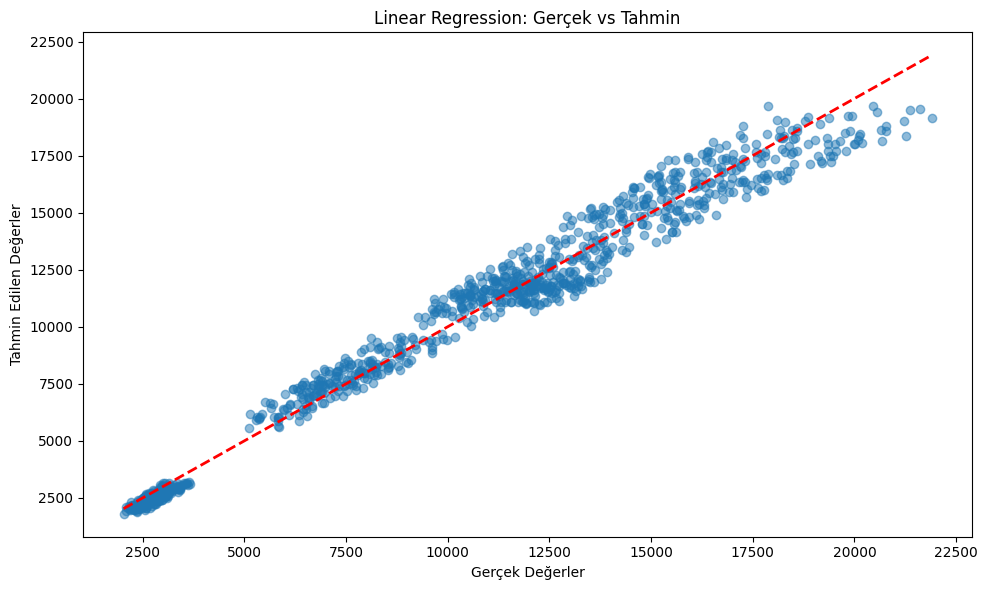

In [ ]:
#8. LinearRegression Modeli

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt


# Linear Regression modeli oluşturma ve eğitme
lr_model = LinearRegression()
lr_model.fit(XTrain, yTrain)

# Tahminler
y_pred_train = lr_model.predict(XTrain)
y_pred_test = lr_model.predict(XTest)

# Regresyon metrikleri
print("Linear Regression Model Performansı:")
print("\nEğitim Seti:")
print(f'R2 Score: {r2_score(yTrain, y_pred_train):.4f}')
print(f'MSE: {mean_squared_error(yTrain, y_pred_train):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(yTrain, y_pred_train)):.4f}')

print("\nTest Seti:")
print(f'R2 Score: {r2_score(yTest, y_pred_test):.4f}')
print(f'MSE: {mean_squared_error(yTest, y_pred_test):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(yTest, y_pred_test)):.4f}')

# Katsayılar ve intercept
coefficients = pd.DataFrame({
    'feature': XSample.columns,
    'coefficient': lr_model.coef_
})
print("\nModel Katsayıları:")
print(coefficients.sort_values('coefficient', ascending=False))
print(f'\nIntercept: {lr_model.intercept_:.4f}')

# Gerçek vs Tahmin grafiği
plt.figure(figsize=(10,6))
plt.scatter(yTest, y_pred_test, alpha=0.5)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Linear Regression: Gerçek vs Tahmin')
plt.tight_layout()
plt.show()



C:\Users\iremm\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 142458416.0000 - mae: 10761.3662 - val_loss: 137669056.0000 - val_mae: 10545.5303
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134985840.0000 - mae: 10433.8721 - val_loss: 118719376.0000 - val_mae: 9745.5381
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103828952.0000 - mae: 9056.0361 - val_loss: 46680344.0000 - val_mae: 5940.0410
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30083518.0000 - mae: 4655.1387 - val_loss: 12083497.0000 - val_mae: 3055.4468
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12480299.0000 - mae: 3022.2559 - val_loss: 9765768.0000 - val_mae: 2682.7783
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10238753.0000 - mae: 2693.5125 - val_loss: 7953726.5000 - val_mae: 2376.2544
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8676665.0000 - mae: 2430.6160 - val_loss: 6615346.5000 - val_mae: 2114.5837
Epoch 8/100
100/100 ━━━

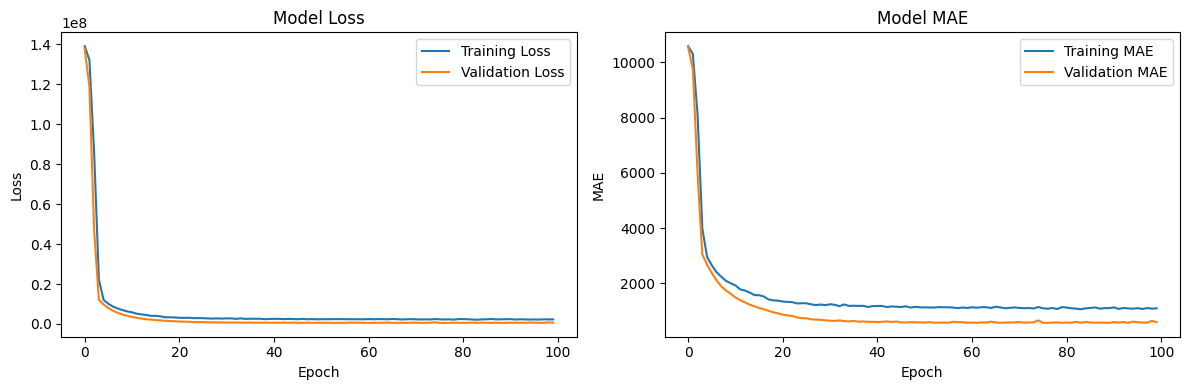

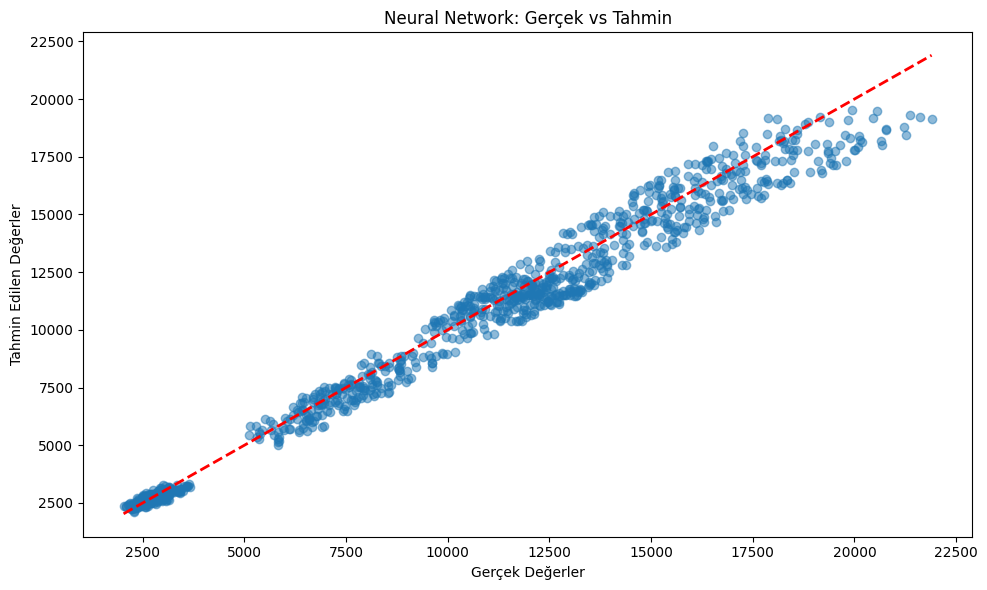

In [25]:
#9. Neural Network model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt


# Neural Network modeli oluşturma
model = Sequential([
    Dense(64, activation='relu', input_shape=(XTrain.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])

# Model derleme
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model özeti
model.summary()

# Model eğitimi
history = model.fit(
    XTrain, yTrain,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

# Tahminler
y_pred_train = model.predict(XTrain)
y_pred_test = model.predict(XTest)

# Model performans metrikleri
print("\nModel Performansı:")
print("\nEğitim Seti:")
print(f'R2 Score: {r2_score(yTrain, y_pred_train):.4f}')
print(f'MSE: {mean_squared_error(yTrain, y_pred_train):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(yTrain, y_pred_train)):.4f}')

print("\nTest Seti:")
print(f'R2 Score: {r2_score(yTest, y_pred_test):.4f}')
print(f'MSE: {mean_squared_error(yTest, y_pred_test):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(yTest, y_pred_test)):.4f}')

# Eğitim geçmişi grafiği
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.show()

# Gerçek vs Tahmin grafiği
plt.figure(figsize=(10,6))
plt.scatter(yTest, y_pred_test, alpha=0.5)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Neural Network: Gerçek vs Tahmin')
plt.tight_layout()
plt.show()


ElasticNet Model Performansı:

Eğitim Seti:
R2 Score: 0.9430
MSE: 1537963.0582
RMSE: 1240.1464

Test Seti:
R2 Score: 0.9490
MSE: 1358670.2995
RMSE: 1165.6201

Model Katsayıları:
          feature  coefficient
0     Enerji_kcal  1320.102274
1           Yağ_g  1115.538476
2    Doymuş_Yağ_g   978.946928
5           Lif_g   662.844718
3  Karbonhidrat_g   592.309082
6       Protein_g   499.084206
4         Şeker_g   238.291152


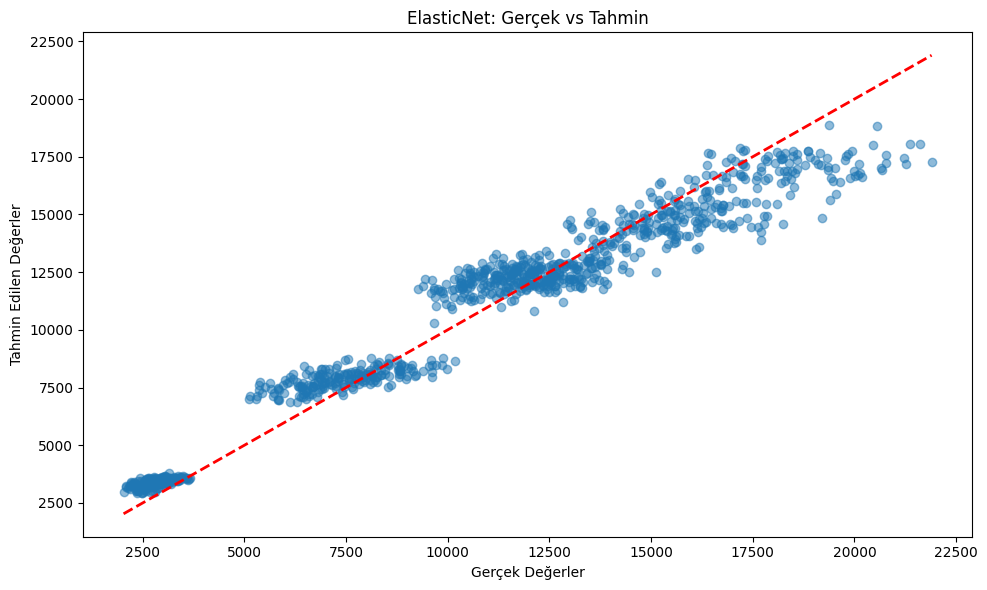

In [27]:
#10 Elatic Model

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# ElasticNet modeli oluşturma ve eğitme
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
elastic_model.fit(XTrain, yTrain)

# Tahminler
y_pred_train = elastic_model.predict(XTrain)
y_pred_test = elastic_model.predict(XTest)

# Model performans metrikleri
print("ElasticNet Model Performansı:")
print("\nEğitim Seti:")
print(f'R2 Score: {r2_score(yTrain, y_pred_train):.4f}')
print(f'MSE: {mean_squared_error(yTrain, y_pred_train):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(yTrain, y_pred_train)):.4f}')

print("\nTest Seti:")
print(f'R2 Score: {r2_score(yTest, y_pred_test):.4f}')
print(f'MSE: {mean_squared_error(yTest, y_pred_test):.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(yTest, y_pred_test)):.4f}')

# Katsayılar
coefficients = pd.DataFrame({
    'feature': XSample.columns,
    'coefficient': elastic_model.coef_
})
print("\nModel Katsayıları:")
print(coefficients.sort_values('coefficient', ascending=False))

# Gerçek vs Tahmin grafiği
plt.figure(figsize=(10,6))
plt.scatter(yTest, y_pred_test, alpha=0.5)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'r--', lw=2)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('ElasticNet: Gerçek vs Tahmin')
plt.tight_layout()
plt.show()
